# Tensor = 다차원 배열
- 데이터를 저장하고 연산할 수 있는 다차원 배열 또는 컨테이너
- 딥러닝에서 모든 데이터(숫자, 이미지, 음성, 영상 등)는 결국 숫자로 표현되어야 하는데, 이 숫자들이 모인 구조가 바로 텐서
- 딥러닝이 학습할 때 사용하는 자료구조
---
- 0차원 (스칼라Scalar): `()` `25` - 단일 데이터, 크기만 있고 방향 없음
- 1차원 (벡터Vector): `(n, )` `[1,2,3,4]` - 리스트 형태 [1,2,3,4]
- 2차원 (행렬Matrix): `(m,n)` `[[1,2,3],[4,5,6]]` - 행과 열로 이루어진 데이터 표데이터, 흑백 이미지
- 3차원 (텐서Tensor): `(height, width, channel)` `이미지(64×64×3)`- 컬러이미지 흑백이미지 + 채널정보(RGB)
- 고차원 텐서: `(batch, height, width, channel)` `동영상, 배치 데이터`,  동영상 -> 이미지개수 \* 가로픽셀 \* 세로픽셀 \* 채널정보
---
- 데이터의 표준 형식: 일관된 숫자 형식
- 효율적인 계산: GPU 지원 -> 병렬연산에 유리
- 딥러닝 프레임워크: Tensorflow, PyTorch

In [ ]:
# %pip install torch torchvision

  Using cached torch-2.9.0-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/109.3 MB 4.8 MB/s eta 0:00:23
   ---------------------------------------- 1.0/109.3 MB 1.6 MB/s eta 0:01:09
    --------------------------------------- 1.6/109.3 MB 2.0 MB/s eta 0:00:56
    --------------------------------------- 2.1/109.3 MB 2.4 MB/s eta 0:00:45
    --------------------------------------- 2.4/109.3 MB 1.9 MB/s eta 0:00:55
    --------------------------------------- 2.6/109.3 MB 1.9 MB/s eta 0:00:56
   - -------------------------------------- 3.7/109.3 MB 2.4 MB/s eta 0:00:44
   - -------------------------------------- 3.7/109.3 MB 2.4 MB/s eta 0:00:44
   - --------------------

## 기본연산

In [1]:
import torch

# 빈 텐서 생성
x = torch.empty(3,4)
x


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [7]:
# 랜덤 텐서
x = torch.rand(3,4)
x

tensor([[0.7298, 0.7282, 0.4265, 0.7151],
        [0.7037, 0.0110, 0.4386, 0.9029],
        [0.7688, 0.2804, 0.4832, 0.0520]])

In [9]:
# 0으로 텐서 초기화
torch.zeros(3,4,dtype=torch.long)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])

In [19]:
# 1로 채워진 텐서
torch.ones(3,4,dtype=torch.long)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [14]:
import numpy as np

print(np.array( [3,5,3,2,1] ))
print(torch.tensor([3,5,3,2,1]))

[3 5 3 2 1]
tensor([3, 5, 3, 2, 1])


In [ ]:
# 기존의 텐서를 기반으로 새로운 텐서 생성
x = torch.ones(3,4)
y = torch.randn_like(x, dtype=torch.float)
x, y

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[ 0.4450,  2.0289, -0.9604, -0.8769],
         [ 0.1919, -0.2640,  0.2251, -1.2086],
         [ 0.4142, -0.5955,  1.2228,  1.3940]]))

In [22]:
x = torch.rand(3,4)
y = torch.rand(3,4)
x, y, x+y

(tensor([[0.8485, 0.8351, 0.1158, 0.8999],
         [0.0298, 0.9319, 0.3211, 0.4081],
         [0.7362, 0.4314, 0.6033, 0.3964]]),
 tensor([[0.2951, 0.1435, 0.3255, 0.0272],
         [0.5274, 0.6188, 0.8670, 0.9124],
         [0.0477, 0.1315, 0.9886, 0.1223]]),
 tensor([[1.1436, 0.9786, 0.4413, 0.9271],
         [0.5572, 1.5506, 1.1881, 1.3204],
         [0.7840, 0.5629, 1.5920, 0.5187]]))

In [ ]:
# in-inplace
# y = y + x

### 행렬 곱셈
- (x,y) * (x1,y1)
- y, x1의 차수는 같아야 함
- 행렬곱 결과: (x,y1)

In [26]:
x = torch.rand(3,4)
y = torch.rand(3,4)
x, y, x*y

(tensor([[0.7732, 0.3941, 0.5555, 0.0144],
         [0.1922, 0.9088, 0.3517, 0.3560],
         [0.4294, 0.4360, 0.1279, 0.6999]]),
 tensor([[0.6941, 0.1145, 0.8377, 0.5970],
         [0.5860, 0.8745, 0.9247, 0.2651],
         [0.6333, 0.1535, 0.5817, 0.0862]]),
 tensor([[0.5366, 0.0451, 0.4654, 0.0086],
         [0.1126, 0.7948, 0.3252, 0.0944],
         [0.2719, 0.0669, 0.0744, 0.0603]]))

In [ ]:
x = torch.rand(3,4)
y = torch.rand(4,5)
x, y, torch.mm(x,y) # x@y

(tensor([[0.5221, 0.2101, 0.4799, 0.9274],
         [0.3936, 0.7672, 0.6333, 0.3567],
         [0.3348, 0.8861, 0.8795, 0.7965]]),
 tensor([[0.8034, 0.5081, 0.6144, 0.2042, 0.6812],
         [0.7676, 0.5241, 0.4143, 0.6675, 0.2122],
         [0.9936, 0.7482, 0.4174, 0.4107, 0.9773],
         [0.3711, 0.2532, 0.9311, 0.3863, 0.9047]]),
 tensor([[1.4017, 0.9693, 1.4717, 0.8022, 1.7082],
         [1.6666, 1.1662, 1.1561, 0.9903, 1.3725],
         [2.1186, 1.4943, 1.6817, 1.3288, 1.9963]]))

## 슬라이싱

In [ ]:
x = torch.rand(4,5)
x, x[0,:], x[1,1] #troch.Tensor 

(tensor([[0.8717, 0.5559, 0.4203, 0.5724, 0.0870],
         [0.2672, 0.3706, 0.9439, 0.2079, 0.2473],
         [0.1642, 0.1708, 0.1743, 0.8307, 0.8404],
         [0.5638, 0.7806, 0.2107, 0.9902, 0.3745]]),
 tensor([0.8717, 0.5559, 0.4203, 0.5724, 0.0870]),
 tensor(0.3706))

In [ ]:
x[1,1].item() #float

0.3705593943595886

In [35]:
print(type(x[1,1])) #troch.Tensor -> GPU
print(type(x[1,1].item())) #float -> CPU

<class 'torch.Tensor'>
<class 'float'>


## 텐서 크기 변경
- `view`: reshape -> 텐서 모양 변경
- `size`: shape -> 텐서 모양 확인
- 가독성.... view size 가 사용되었다는 것은 자료구조가 텐서임을 명시

In [ ]:
# reshape, view
# numpy와 동일한 기능
import torch

x = torch.rand(4,4)
y = x.view(16)

z = x.view(-1) #자동계산

x, y, z, x.shape, y.shape

(tensor([[0.9130, 0.0976, 0.4871, 0.8244],
         [0.1436, 0.9059, 0.6176, 0.6663],
         [0.9688, 0.7922, 0.6782, 0.9814],
         [0.5763, 0.2653, 0.8060, 0.2879]]),
 tensor([0.9130, 0.0976, 0.4871, 0.8244, 0.1436, 0.9059, 0.6176, 0.6663, 0.9688,
         0.7922, 0.6782, 0.9814, 0.5763, 0.2653, 0.8060, 0.2879]),
 tensor([0.9130, 0.0976, 0.4871, 0.8244, 0.1436, 0.9059, 0.6176, 0.6663, 0.9688,
         0.7922, 0.6782, 0.9814, 0.5763, 0.2653, 0.8060, 0.2879]),
 torch.Size([4, 4]),
 torch.Size([16]))

In [ ]:
a = x.view(2,8)
c = x.view(-1,8)
d = x.view(2,-1)

a,c,d

(tensor([[0.9130, 0.0976, 0.4871, 0.8244, 0.1436, 0.9059, 0.6176, 0.6663],
         [0.9688, 0.7922, 0.6782, 0.9814, 0.5763, 0.2653, 0.8060, 0.2879]]),
 tensor([[0.9130, 0.0976],
         [0.4871, 0.8244],
         [0.1436, 0.9059],
         [0.6176, 0.6663],
         [0.9688, 0.7922],
         [0.6782, 0.9814],
         [0.5763, 0.2653],
         [0.8060, 0.2879]]),
 tensor([[0.9130, 0.0976, 0.4871, 0.8244, 0.1436, 0.9059, 0.6176, 0.6663],
         [0.9688, 0.7922, 0.6782, 0.9814, 0.5763, 0.2653, 0.8060, 0.2879]]),
 tensor([[0.9130, 0.0976, 0.4871, 0.8244, 0.1436, 0.9059, 0.6176, 0.6663],
         [0.9688, 0.7922, 0.6782, 0.9814, 0.5763, 0.2653, 0.8060, 0.2879]]))

## 텐서 <-> 넘파이

In [ ]:
import torch
import numpy as np

# 텐서 -> 넘파이
a = torch.ones(5)
a.numpy()

array([1., 1., 1., 1., 1.], dtype=float32)

In [19]:
# 넘파이 -> 텐서
b = np.array([1,2,3,4,5])
torch.from_numpy(b)

tensor([1, 2, 3, 4, 5])

## GPU 사용

In [23]:
import torch
if torch.cuda.is_available():
    device = torch.device('cuda')
    # 텐서들은 gpu에서 연산되기 때문에, 생성을 gpu에서 함
    x = torch.ones(5, device=device) #gpu에서 생성
    y = torch.ones(5) #cpu에서 생성
    y = y.to(device) #cpu -> gpu 이동
    z = x + y
    print(f'GPU 연산결과: {z}')
    print(f'다시 CPU로: {z.to("cpu", torch.double)}')

else:
    print("CUDA를 사용할 수 없습니다.")
    device = torch.device('cpu')

CUDA를 사용할 수 없습니다.


- 텐서는 딥러닝을 위해 만든 자료구조 -> 내부 gpu 연산에 특화된 구조, 일반적인 모양은 넘파이와 동일
- 텐서는 gpu연산을 지원

## 자동 미분(Autograd)
- 매 계산과정마다 해당 계산과정의 미분값을 저장
- PyTorch:
- `requires_grad = True`로 설정하면, 계산 그래프 형태로 기록 -> 동영상 녹화와 비슷한 원리
- `.backword()` -> 이 과정을 거꾸로 되감으며 각 단계의 미분값을 계산 -> 최종 기울기를 얻음
---
**순전파 → 자동 미분(기록) → 역전파 → 가중치 갱신**

| 구분        | 역할                 | Autograd의 관여       | 결과             |
| --------- | ------------------ | ------------------ | -------------- |
| **순전파**   | 입력 → 출력 계산         | 계산 그래프 생성 및 기록     | 예측값            |
| **자동 미분** | 계산 그래프 관리          | 순전파 중 모든 연산 추적     | 역전파 준비         |
| **역전파**   | 출력 → 입력 방향으로 미분 계산 | Autograd가 그래프를 역추적 | 각 변수의 gradient |

In [15]:
import torch

# 1. 순전파 (Forward)
x = torch.tensor([2.0], requires_grad=True) # 미분 가능한 변수로 인식, 계산 그래프 형태로 기록
y = 3*x**2 + 2*x + 1  # Autograd가 계산 그래프 생성 및 기록

# 2. 역전파 (Backward)
y.backward()           # Autograd가 그래프 역추적하여 미분 계산

# 3. 결과 확인
print(x.grad)          # → 14 (dy/dx)

tensor([14.])


#### 기울기 제어
- 유클리드 노름

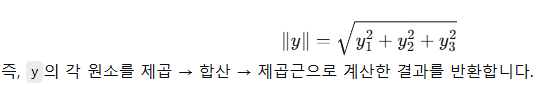

- 스칼라 Backward: 역전파로 구하는 기울기가 하나일 때, `out.backward()` <br>
> 최종 점수가 숫자 하나일 때 <br>
> ex. 수학공부 1시간했을 때 최종점수에 몇 점의 영향을 줬는지 <br>
> 최종 목표가 하나(스칼라)이기 때문에 각 원인(각 변수)의 기여도를 바로 계산

- 벡터 Backward: 기울기가 여러개일 때, `y.backward(v)`
> 과목별(국영수) 점수가 담긴 성적표(벡터), 공부 시간이 어떤 과목의 성적에 얼마나 영향을 미치는지 모름 <br>
> \***가중치** or \***중요도**를 알려주는 벡터가 필요   `v=torch.tensor([,,],dtype=torch.float)` <br>
> 중요도를 반영해 최종적인 공부시간의 기여도를 확인

In [18]:
# 각 학습을 진행하면서 중간에 모델의 성능 평가 필요 <- 기울기 계산을 하면 안됨
with torch.no_grad():
    print(f'no_grad 내부: {(x**2).requires_grad}')

# .detach() 계산그래프에서 텐서를 분리
print(f'detach 전: {y.requires_grad}')
y = x.detach()
print(f'detach 후 {y.requires_grad}')

no_grad 내부: False
detach 전: False
detach 후 False


In [14]:
import torch

x = torch.randn(3, requires_grad=True)
print(x)
# x는 y로부터 연산기록을 물려받음

y = x*2
print(y.data) # Tensor의 기록을 무시하고, 순수 data만 반환

# 노름(유클리드 노름): - 벡터의 크기를 측정하는 방법(원점~벡터까지의 거리)
#                     - 모든 요소를 각각 제곱하고 더해 결과에 제곱근
#                     - y의 실제 데이터 크기를 확인해 반복
print(y.data.norm())


tensor([-0.3988, -0.2269,  1.7421], requires_grad=True)
tensor([-0.7976, -0.4538,  3.4841])
tensor(3.6030)
